# Import 

In [1]:
import tensorflow_datasets as tfds

In [3]:
# import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, 
    Dense,
    Flatten,
    Reshape,
    LeakyReLU,
    Dropout,
    UpSampling2D
)
# import keras
import tensorflow.keras.backend as K
import numpy as np

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Model

In [4]:
# Check GPU
import tensorflow as tf
# import keras
gpus = tf.config.experimental.list_physical_devices("GPU")
for each in gpus:
    tf.config.experimental.set_memory_growth(each, True)

2024-03-26 18:56:11.156960: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-03-26 18:56:11.172814: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-03-26 18:56:11.241380: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-26 18:56:11.242119: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro M4000M computeCapability: 5.2
coreClock: 1.013GHz coreCount: 10 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 149.31GiB/s
2024-03-26 18:56:11.242167: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-03-26 18:56:11.308520: I tensorflow/stream_executor/platform/default/dso_

In [6]:
# Check keras
keras.__version__

NameError: name 'keras' is not defined

In [7]:
# Dataset
ds = tfds.load('fashion_mnist', split='train')

2024-03-26 18:56:32.509877: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-26 18:56:32.511362: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-03-26 18:56:32.511634: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-26 18:56:32.511840: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro M4000M computeCapability: 5.2
coreClock: 1.013GHz coreCount: 10 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 149.31GiB/s
2024-

In [8]:
ds.as_numpy_iterator().next()["label"]

2024-03-26 18:56:37.453297: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-03-26 18:56:37.457015: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2699905000 Hz
2024-03-26 18:56:37.533603: W tensorflow/core/kernels/data/cache_dataset_ops.cc:757] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


2

# Viz data and build dataset

In [9]:
# import numpy as np

In [10]:
dataiterator = ds.as_numpy_iterator()

In [11]:
dataiterator.next()["image"]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

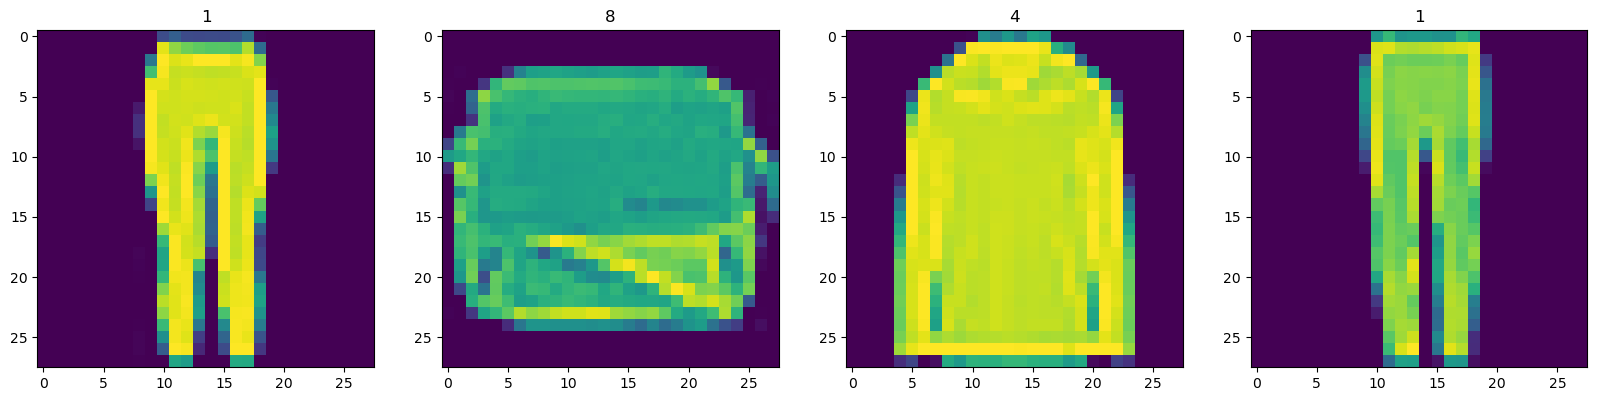

In [12]:
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx in range(4): 
    # Grab an image and label
    sample = dataiterator.next()
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(sample['image']))
    # Appending the image label as the plot title 
    ax[idx].title.set_text(sample['label'])

In [13]:
def scale_imgs(data):
    image = data["image"]
    return image/255

In [14]:
ds = tfds.load("fashion_mnist", split="train")
ds = ds.map(scale_imgs)
ds = ds.cache() # cache the dataset for the batch
ds = ds.shuffle(60000)
ds = ds.batch(128) # batch into 128 imgs per sample
"""
The prefetch parameter allows you to control the number of batches 
to prefetch from the dataset, leading to improved training 
performance.
"""
ds = ds.prefetch(64) # reducing the likelihood of bottlenecking

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [15]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# Build neural network

In [16]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import (
#     Conv2D, 
#     Dense,
#     Flatten,
#     Reshape,
#     LeakyReLU,
#     Dropout,
#     UpSampling2D
# )

In [17]:
def build_generator(): 
    model = Sequential()
    
    # Takes in random values and reshapes it to 7x7x128
    # Beginnings of a generated image
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    # Upsampling block 1 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Upsampling block 2 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Conv layer to get to one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))
    
    return model

In [18]:
generator = build_generator()

In [19]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              809088    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 6272)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 128)       409728    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 128)       0

In [20]:
# test for image generation
img = generator.predict(np.random.randn(4,128))

2024-03-26 18:56:43.917343: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-03-26 18:56:44.433729: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2024-03-26 18:56:46.152798: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2024-03-26 18:56:46.190485: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


In [21]:
img.shape

(4, 28, 28, 1)

In [22]:
np.random.randn(4,128).size, np.random.randn(4,128).shape, np.random.randn(4,128).ndim

(512, (4, 128), 2)

In [23]:
np.random.randn(4,128,1).ndim,

(3,)

(28, 28) (28, 28, 1)
(28, 28) (28, 28, 1)
(28, 28) (28, 28, 1)
(28, 28) (28, 28, 1)


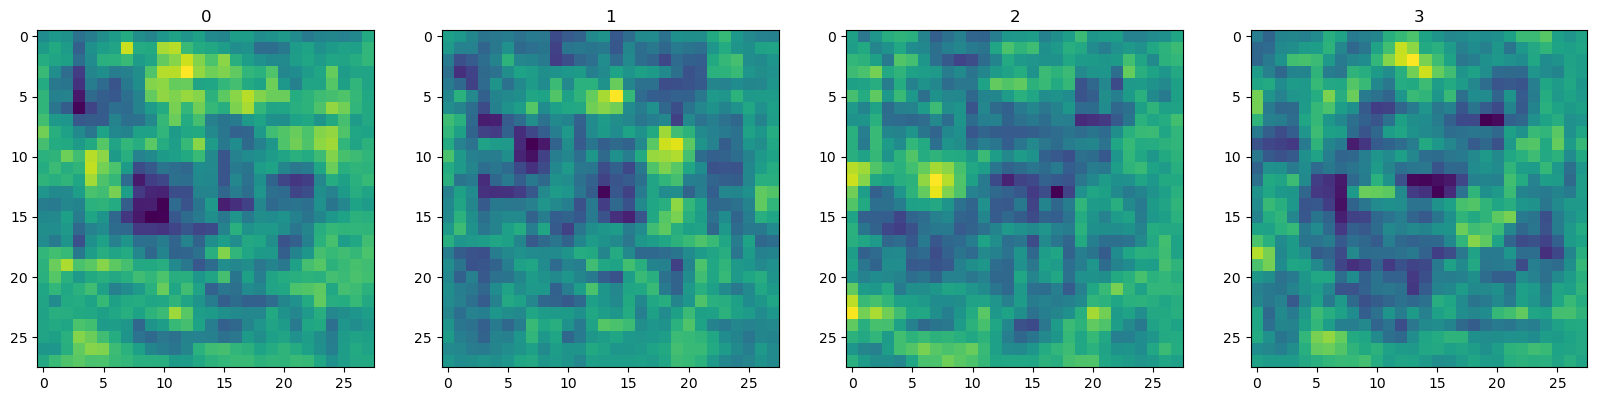

In [24]:
img = generator.predict(np.random.randn(4,128))
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for inx, img in enumerate(img):
    print(np.squeeze(img).shape, img.shape)
#     ax[inx].imshow(np.squeeze(img))
    ax[inx].imshow(img)
    ax[inx].title.set_text(inx)
    

In [25]:
def build_discriminator():
    model = Sequential()
    
    model.add(Conv2D(32, 5, input_shape=(28,28,1)))
    model.add(LeakyReLU(.2))
    model.add(Dropout(.4))
    
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(.2))
    model.add(Dropout(.4))
    
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(.2))
    model.add(Dropout(.4))
    
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(.2))
    model.add(Dropout(.4))
    
    # Flatten the pass to dense layer
    model.add(Flatten())
    model.add(Dropout(.4))
    model.add(Dense(1, activation="sigmoid"))
    
    return model

In [26]:
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 20, 20, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)      

In [27]:
img = generator.predict(np.random.randn(4,128))
img.shape

(4, 28, 28, 1)

In [28]:
img_gen = discriminator.predict(img)
img_gen.shape

(4, 1)

In [29]:
img_gen

array([[0.50093466],
       [0.50093675],
       [0.50099564],
       [0.50106305]], dtype=float32)

# Training loop

In [30]:
# losses and optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [31]:
# generator optim
g_opt = Adam(learning_rate=.0001)
# discriminator optim
d_opt = Adam(learning_rate=.00001)
# generator loss
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [32]:
# subclased model
from tensorflow.keras.models import Model

$$BCE = - (1/N) Σ [y_i * log(p(y_i)) + (1 - y_i) * log(1 - p(y_i))]$$ 

`If y_i is 1, p(y_i) close to 1 too, the right half formula becomes 0, therefore, -(y_i * log(~=1)) => minimum loss value`

`conversely, if y_i is 0, and p(y_i) close to 0 too, the left half becomes 0, the right half -(1* log(1-~=0)) => minimum loss value` 


> When the predicted probability (p(y_i)) closely matches the actual label (y_i), the log term becomes closer to 0 (because the log of 1 is 0). This minimizes the penalty for correct predictions.
When the predicted probability deviates from the actual label, the log term becomes more negative (due to the log of values less than 1 being negative), leading to a higher penalty for incorrect predictions.

```python
BinaryCrossEntropy(true_label, predicted_label)
```

In [33]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # create attributes for generator and discriminator
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # compile with base class
        super().compile(*args, **kwargs)

        # create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        # get the data
        real_imgs = batch # real imgs from batch of real img data
        # fake imgs from generator 
        fake_imgs = self.generator(tf.random.normal((128, 128, 1)), training=False)

        ###################################
        # Train the discriminator 
        ###################################
        with tf.GradientTape() as d_tape:
            # pass the real and fake image to the discriminator 
            yhat_real = self.discriminator(real_imgs, training=True)
            yhat_fake = self.discriminator(fake_imgs, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # create labels for real and fake imgs
            # because the goal of discriminator is to maximize 
            # the fakeness of generated image while detecting 
            # the real imgs, so yhat_real which is the generated
            # image by zeros_like, and yhat_fake is ones_like
            y_realfake = tf.concat([tf.zeros_like(yhat_real), 
                                   tf.ones_like(yhat_fake)],
                                   axis=0)
            # add some noise to the TRUE outputs
            noise_real = .15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # calculate loss - binarycross
            # discriminator loss
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
        
        # apply backpropagation -nn learn
        # prepare the gradient based total loss and the trainables
        # similar to loss.backward in pytorch
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        # apply the gradients, i.e. gradient descent and parameters update
        # similar to optim.step in pytorch
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        #############################################################
        # Train the generator
        #############################################################
        with tf.GradientTape as g_tape:
            # generate some new imgs
            gen_imgs = self.generator(tf.random.normal((128, 128, 1)),
                                      training=True)
            
            # the predicted labels by discriminator
            predicted_labels = self.discriminator(gen_imgs, training=False)
            
            # calculate total gen loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)
            
            

In [80]:
fashgan = FashionGAN(generator, discriminator)

In [81]:
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

TensorShape([128, 128, 1])